In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout,Embedding,Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
df_real = pd.read_csv('True.csv', sep=',', encoding='latin-1', error_bad_lines=False)
df_real

Skipping line 11067: expected 4 fields, saw 8



,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21411,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21412,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21413,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21414,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [3]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [4]:
df_fake = pd.read_csv('Fake.csv', sep=',', encoding='latin-1', error_bad_lines=False)
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [6]:
df_real['class']= 1
df_fake['class']=0

In [7]:
df = pd.concat([df_fake, df_real],ignore_index=True, sort=False)
df

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44892,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44893,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44894,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44895,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [8]:
def clean_text(text):
    punc = list(punctuation)
    stop = stopwords.words('english')
    bad_tokens = punc + stop
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text)
    word_tokens = [t for t in tokens if t.isalpha()]
    clean_tokens = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    return ' '.join(clean_tokens)

In [9]:
#data_fake['news'] = data_fake['text'].apply(clean_text)

In [10]:
#all_words = ' '.join(word for word in data_fake['news'])#
#all_words

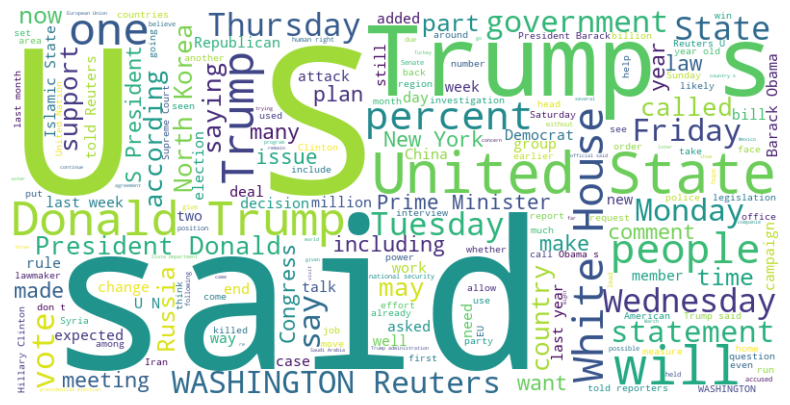

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df_real['text'] contains the text data for real news
real_text_data = df_real['text']

# Combine all the text into a single string
text = ' '.join(real_text_data)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [12]:
tfidf_vectorizer_real = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))
tfidf_matrix_real = tfidf_vectorizer_real.fit_transform(df_real['text'])
feature_names_real = tfidf_vectorizer_real.get_feature_names_out()
average_tfidf_values_real = tfidf_matrix_real.mean(axis=0)
term_tfidf_dict_real = {feature_names_real[i]: average_tfidf_values_real[0, i] for i in range(len(feature_names_real))}
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_tfidf_dict_real)



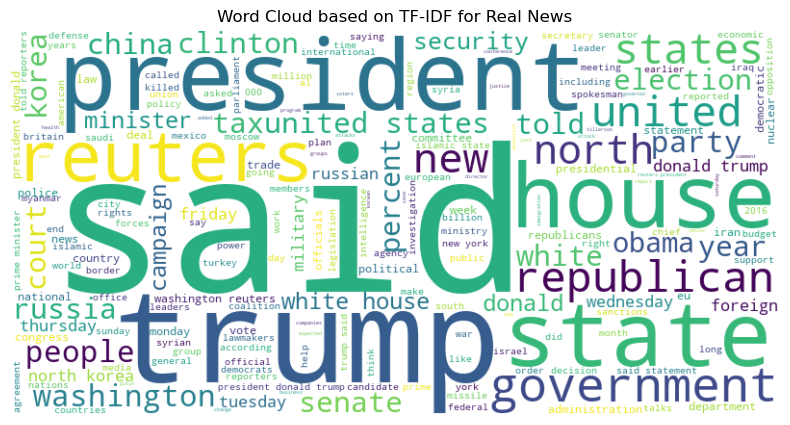

In [13]:
# Plot the WordCloud image for real news
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud based on TF-IDF for Real News')
plt.show()

Fake news

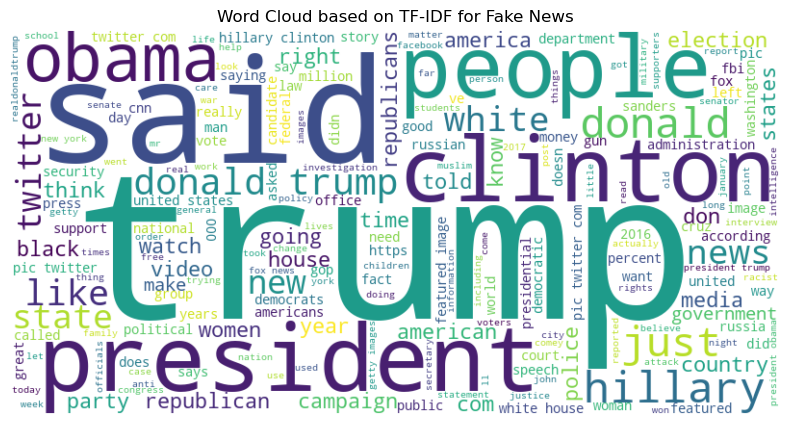

In [14]:
# TF-IDF for fake news
tfidf_vectorizer_fake = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))
tfidf_matrix_fake = tfidf_vectorizer_fake.fit_transform(df_fake['text'])
feature_names_fake = tfidf_vectorizer_fake.get_feature_names_out()
average_tfidf_values_fake = tfidf_matrix_fake.mean(axis=0)
term_tfidf_dict_fake = {feature_names_fake[i]: average_tfidf_values_fake[0, i] for i in range(len(feature_names_fake))}
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_tfidf_dict_fake)

# Plot the WordCloud image for fake news
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud based on TF-IDF for Fake News')
plt.show()

In [15]:
df

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44892,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44893,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44894,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44895,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,3))
tfidf_matrix_df=tfidf_vectorizer.fit_transform(df['text'])
feature_names = tfidf_vectorizer.get_feature_names_out()

In [17]:
len(feature_names)

10562026

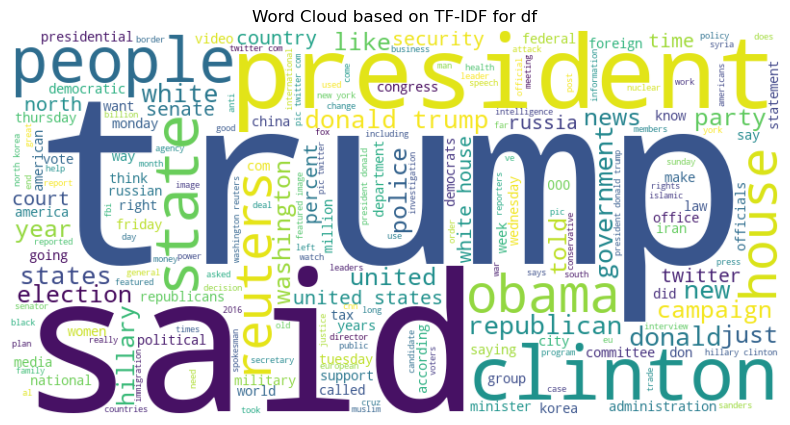

In [18]:
average_tfidf_values = tfidf_matrix_df.mean(axis=0)
term_tfidf_dict = {feature_names[i]: average_tfidf_values[0, i] for i in range(len(feature_names))}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_tfidf_dict)
# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud based on TF-IDF for df')
plt.show()

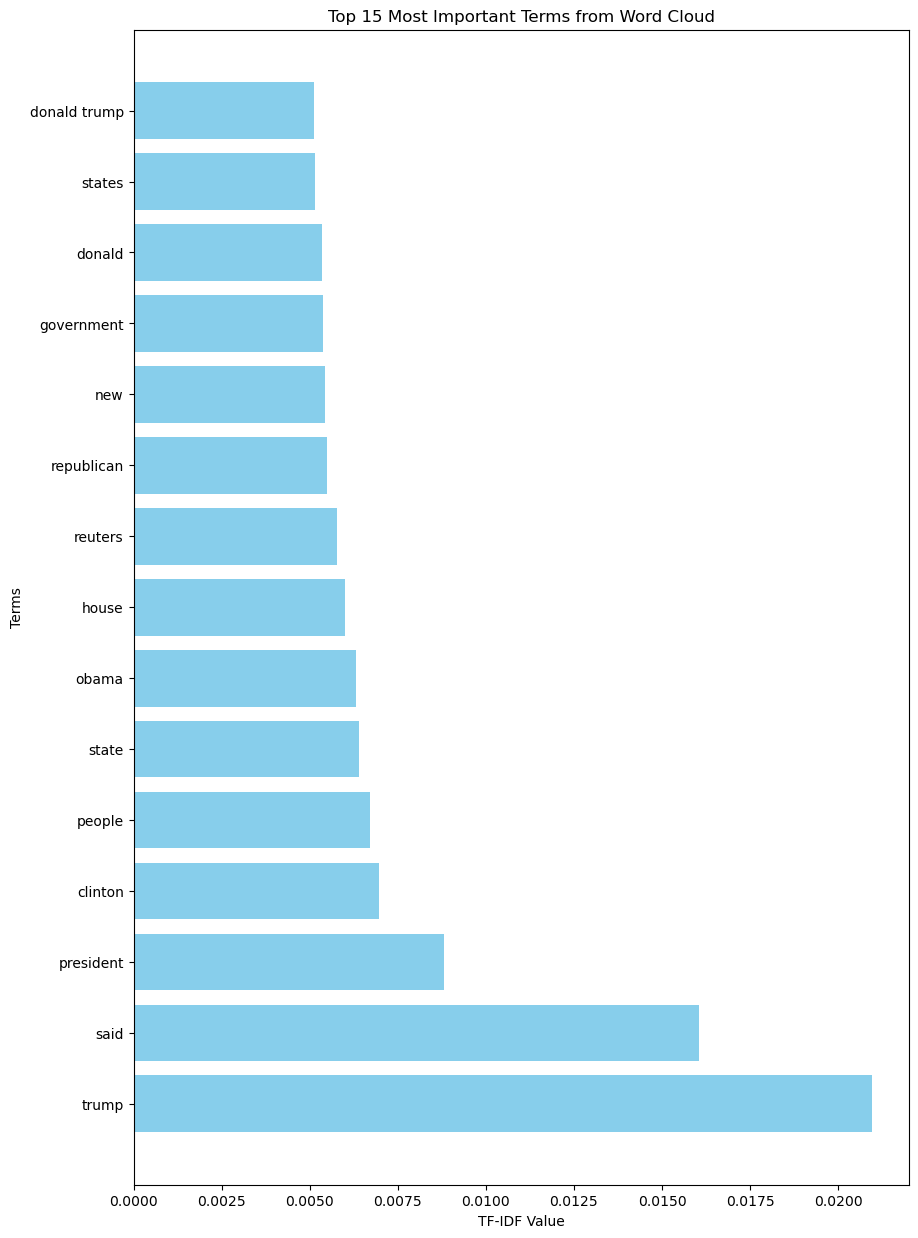

In [19]:
# Sort the terms based on their TF-IDF values in descending order
sorted_terms = sorted(term_tfidf_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the top N terms and their TF-IDF values
top_n = 15  # You can adjust this value based on the number of terms you want to display
top_terms = [term[0] for term in sorted_terms[:top_n]]
top_tfidf_values = [term[1] for term in sorted_terms[:top_n]]

# Plot a bar graph
plt.figure(figsize=(10, 15))
plt.barh(top_terms, top_tfidf_values, color='skyblue')
plt.xlabel('TF-IDF Value')
plt.ylabel('Terms')
plt.title('Top {} Most Important Terms from Word Cloud'.format(top_n))
plt.show()

In [20]:
#tfidf_vectorizer.get_params

# Model Building

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.2, random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3), max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build a classifier (using Multinomial Naive Bayes as an example)
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the training set
y_train_pred = classifier.predict(X_train_tfidf)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_rep = classification_report(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = classifier.predict(X_test_tfidf)

# Evaluate the model on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Print the results
print("Training Metrics:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print("\nTraining Confusion Matrix:")
print(train_conf_matrix)
print("\nTraining Classification Report:")
print(train_classification_rep)

print("\n--------------------------------------\n")

print("Testing Metrics:")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("\nTesting Confusion Matrix:")
print(test_conf_matrix)
print("\nTesting Classification Report:")
print(test_classification_rep)


Training Metrics:
Training Accuracy: 0.9477

Training Confusion Matrix:
[[17798   948]
 [  931 16240]]

Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     18746
           1       0.94      0.95      0.95     17171

    accuracy                           0.95     35917
   macro avg       0.95      0.95      0.95     35917
weighted avg       0.95      0.95      0.95     35917


--------------------------------------

Testing Metrics:
Testing Accuracy: 0.9467

Testing Confusion Matrix:
[[4495  240]
 [ 239 4006]]

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4735
           1       0.94      0.94      0.94      4245

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



In [23]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.2, random_state=42)


# Create a pipeline with TF-IDF vectorizer and Multinomial Naive Bayes classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1, 1))),
    ('clf', MultinomialNB())
])

# Define hyperparameters for tuning
parameters = {
    
    'tfidf__max_features': list(range(5000, 10000, 1000)),  
    'clf__alpha': [0.1, 0.5, 1.0]
}

# Perform Grid Search
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)




Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.1, 0.5, 1.0],
                         'tfidf__max_features': [5000, 6000, 7000, 8000, 9000]},
             scoring='accuracy', verbose=1)

In [24]:
# Print the best parameters
print("Best Parameters:")
print(grid_search.best_params_)



Best Parameters:
{'clf__alpha': 0.1, 'tfidf__max_features': 7000}


In [25]:
# Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"\nAccuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.9331

Confusion Matrix:
[[4477  258]
 [ 343 3902]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4735
           1       0.94      0.92      0.93      4245

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [26]:

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Training Accuracy:", grid_search.best_score_)
print("Testing Accuracy:", test_accuracy)

Best Hyperparameters: {'clf__alpha': 0.1, 'tfidf__max_features': 7000}
Best Training Accuracy: 0.9329286436950397
Testing Accuracy: 0.9330734966592428


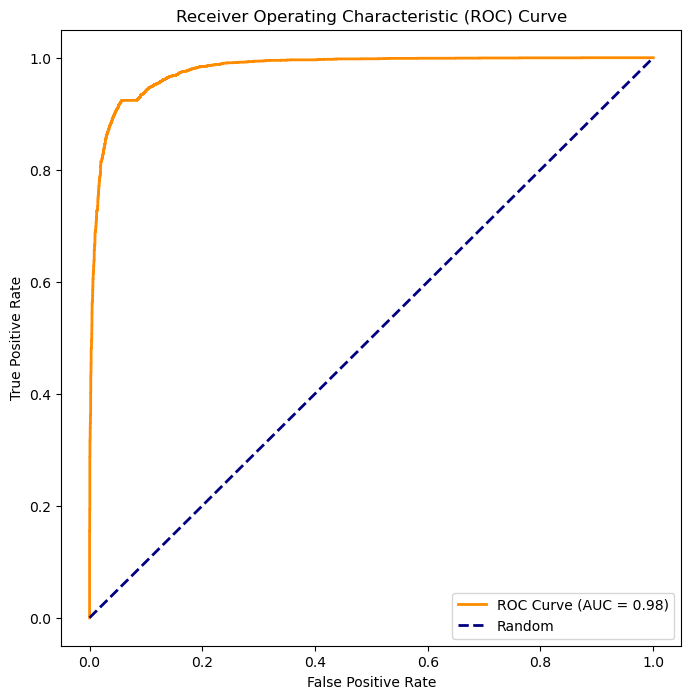

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

best_model = grid_search.best_estimator_

# Get predicted probabilities for the positive class
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




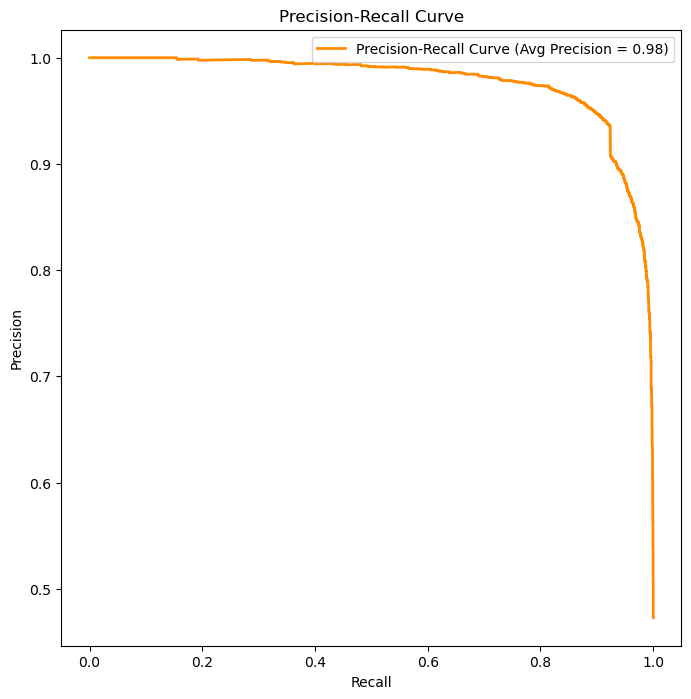

In [28]:
# Plot Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall Curve (Avg Precision = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.2, random_state=42,stratify=df['class'])

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3), max_features=7000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Build a classifier (using Multinomial Naive Bayes as an example)
classifier = MultinomialNB()

# Create StratifiedKFold for cross-validation (stratified to ensure balanced classes)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store training and testing accuracies during cross-validation
train_accuracies = []
test_accuracies = []

# Perform cross-validation
for train_index, test_index in cv.split(X_train_tfidf, y_train):
    X_train_cv, X_test_cv = X_train_tfidf[train_index], X_train_tfidf[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Train the classifier
    classifier.fit(X_train_cv, y_train_cv)
    
    # Make predictions on the training set
    y_train_pred = classifier.predict(X_train_cv)
    
    # Make predictions on the test set
    y_test_pred = classifier.predict(X_test_cv)
    
    # Calculate and store training accuracy
    train_accuracy = accuracy_score(y_train_cv, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Calculate and store testing accuracy
    test_accuracy = accuracy_score(y_test_cv, y_test_pred)
    test_accuracies.append(test_accuracy)

# Print the results
print("Cross-Validation Results:")
print(f"Mean Training Accuracy: {sum(train_accuracies) / len(train_accuracies):.4f}")
print(f"Mean Testing Accuracy: {sum(test_accuracies) / len(test_accuracies):.4f}")
print(f"Training Accuracies: {train_accuracies}")
print(f"Testing Accuracies: {test_accuracies}")


Cross-Validation Results:
Mean Training Accuracy: 0.9506
Mean Testing Accuracy: 0.9487
Training Accuracies: [0.9507882922075662, 0.9514147495910625, 0.9499895594069743, 0.9501287673139834, 0.9507900048722767]
Testing Accuracies: [0.9461302895322939, 0.9451559020044543, 0.9536405401642768, 0.9490463594598357, 0.9497424474453571]


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.2, random_state=42,stratify=df['class'])

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3), max_features=7000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build a classifier (using Multinomial Naive Bayes as an example)
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Save the model and vectorizer using joblib
joblib.dump(classifier, 'model.pkl')
joblib.dump(tfidf_vectorizer, 'vectorizer.pkl')

# Make predictions on the training set
y_train_pred = classifier.predict(X_train_tfidf)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_rep = classification_report(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = classifier.predict(X_test_tfidf)

# Evaluate the model on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Print the results
print("Training Metrics:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print("\nTraining Confusion Matrix:")
print(train_conf_matrix)
print("\nTraining Classification Report:")
print(train_classification_rep)

print("\n--------------------------------------\n")

print("Testing Metrics:")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("\nTesting Confusion Matrix:")
print(test_conf_matrix)
print("\nTesting Classification Report:")
print(test_classification_rep)


Training Metrics:
Training Accuracy: 0.9509

Training Confusion Matrix:
[[17874   910]
 [  852 16281]]

Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     18784
           1       0.95      0.95      0.95     17133

    accuracy                           0.95     35917
   macro avg       0.95      0.95      0.95     35917
weighted avg       0.95      0.95      0.95     35917


--------------------------------------

Testing Metrics:
Testing Accuracy: 0.9503

Testing Confusion Matrix:
[[4463  234]
 [ 212 4071]]

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4697
           1       0.95      0.95      0.95      4283

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



In [34]:
import joblib
joblib.dump(tfidf_vectorizer, 'tfidf.pkl')
joblib.dump(classifier, 'MNB.pkl')
    

['MNB.pkl']

In [35]:
joblib.dump(df, 'data.pkl')



['data.pkl']

# 2. Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from textblob import TextBlob



# Calculate sentiment scores for the combined dataset
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['text', 'sentiment']], df['class'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3),max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['text'])


In [ ]:

# Combine TF-IDF features with sentiment scores
X_train_combined = hstack([X_train_tfidf, X_train['sentiment'].values.reshape(-1, 1)])
X_test_combined = hstack([X_test_tfidf, X_test['sentiment'].values.reshape(-1, 1)])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Build a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train_combined, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_combined)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_prob = classifier.predict_proba(X_test_combined)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3),max_features=7000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['text'])


In [ ]:
# Combine TF-IDF features with sentiment scores
X_train_combined = hstack([X_train_tfidf, X_train['sentiment'].values.reshape(-1, 1)])
X_test_combined = hstack([X_test_tfidf, X_test['sentiment'].values.reshape(-1, 1)])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Build a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train_combined, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_combined)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.sparse import hstack, vstack

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['text', 'sentiment']], df['class'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3), max_features=7000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['text'])

# Combine TF-IDF features with sentiment scores
X_train_combined = hstack([X_train_tfidf, X_train['sentiment'].values.reshape(-1, 1)])
X_test_combined = hstack([X_test_tfidf, X_test['sentiment'].values.reshape(-1, 1)])

# Create a logistic regression classifier
classifier = LogisticRegression()

# Combine TF-IDF features with sentiment scores
X_combined = vstack([X_train_combined, X_test_combined])

# Create StratifiedKFold for cross-validation (stratified to ensure balanced classes)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Convert the combined feature matrix to a dense NumPy array
X_combined_dense = X_combined.toarray()

# Perform cross-validation
cv_accuracy = cross_val_score(classifier, X_combined_dense, df['class'], cv=cv, scoring='accuracy')

# Fit the classifier on the entire training set
classifier.fit(X_train_combined, y_train)

# Make predictions on the training set
y_train_pred = classifier.predict(X_train_combined)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = classifier.predict(X_test_combined)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the results
print("Cross-Validation Results:")
print(f"Mean Accuracy: {cv_accuracy.mean():.4f}")
print(f"Standard Deviation: {cv_accuracy.std():.4f}")

print("\nTraining Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
